# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [46]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

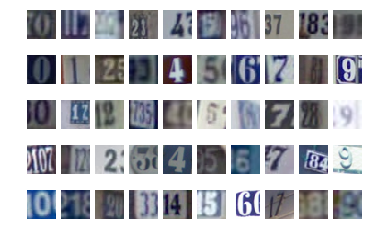

In [47]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [48]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 3*3*32]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [49]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`

In [50]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [19]:
dists

array([[254316., 179329., 219209., ..., 198815., 209914., 232089.],
       [216973., 122250., 185014., ..., 138026., 137911., 155840.],
       [190266., 108195., 149541., ..., 126707.,  72704., 113209.],
       ...,
       [287085., 132698., 239600., ..., 206524., 250417., 252018.],
       [154868., 298041., 179729., ..., 207489., 154348., 152805.],
       [185868., 105589., 141915., ..., 124547., 112164., 123563.]],
      dtype=float32)

In [51]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [52]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [53]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

43.1 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.2 ms ± 5.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.8 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)

In [59]:
# TODO: implement binary_classification_metrics in metrics.py
accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.60, Precision: 0.83, Recall: 0.50, F1: 0.62


In [61]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# print('Accuracy is ', accuracy_score(binary_test_y, prediction))
# print(classification_report(binary_test_y, prediction))

Accuracy is  0.6
              precision    recall  f1-score   support

       False       0.44      0.80      0.57         5
        True       0.83      0.50      0.62        10

   micro avg       0.60      0.60      0.60        15
   macro avg       0.64      0.65      0.60        15
weighted avg       0.70      0.60      0.61        15



In [62]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.71, Precision: 0.67, Recall: 0.86, F1: 0.60


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение k! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [87]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
train_folds_X = np.array_split(binary_train_X, num_folds)
train_folds_y = np.array_split(binary_train_y, num_folds)

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    f1_folds = []
    for j in range(num_folds):
        X_train_crossval = np.vstack(train_folds_X[0:j] + train_folds_X[j+1:])
        X_test_crossval = train_folds_X[j]
        
        y_train_crossval = np.hstack(train_folds_y[0:j]+train_folds_y[j+1:])
        y_test_crossval = train_folds_y[j]
        
        clf = KNN(k=k)
        
        clf.fit(X_train_crossval, y_train_crossval)
        prediction = clf.predict(X_test_crossval)
        precision, recall, f1, accuracy = binary_classification_metrics(prediction, y_test_crossval)
        f1_folds.append(f1)
    k_to_f1[k] = np.array(f1_folds).mean()

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 0.689101
k = 2, f1 = 0.372138
k = 3, f1 = 0.740511
k = 5, f1 = 0.760143
k = 8, f1 = 0.552205
k = 10, f1 = 0.538601
k = 15, f1 = 0.675181
k = 20, f1 = 0.644477
k = 25, f1 = 0.747789
k = 50, f1 = 0.859398


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [88]:
# TODO Set the best k to the best value found by cross-validation
best_k = 50

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 50
Accuracy: 0.80, Precision: 0.67, Recall: 0.67, F1: 1.00


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [89]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [90]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [91]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.35


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [92]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

train_folds_X = np.array_split(train_X, num_folds)
train_folds_y = np.array_split(train_y, num_folds)

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    accuracy_folds = []
    for j in range(num_folds):
        X_train_crossval = np.vstack(train_folds_X[0:j] + train_folds_X[j+1:])
        X_test_crossval = train_folds_X[j]
        y_train_crossval = np.hstack(train_folds_y[0:j]+train_folds_y[j+1:])
        y_test_crossval = train_folds_y[j]
        clf = KNN(k=k)
        clf.fit(X_train_crossval, y_train_crossval)
        accuracy = multiclass_accuracy(prediction, y_test_crossval)
        accuracy_folds.append(accuracy)
    k_to_accuracy[k] = np.array(accuracy_folds).mean()
    

for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

k = 1, accuracy = 0.160000
k = 2, accuracy = 0.160000
k = 3, accuracy = 0.160000
k = 5, accuracy = 0.160000
k = 8, accuracy = 0.160000
k = 10, accuracy = 0.160000
k = 15, accuracy = 0.160000
k = 20, accuracy = 0.160000
k = 25, accuracy = 0.160000
k = 50, accuracy = 0.160000


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [93]:
# TODO Set the best k as a best from computed
best_k = 1

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.35
